In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
genus = ['Helicobacter',
 'Pseudomonas',
 'Acinetobacter',
 'Neisseria',
 'Escherichia',
 'Phocaeicola',
 'Cereibacter',
 'Staphylococcus',
 'Staphylococcus',
 'Deinococcus',
 'Streptococcus',
 'Streptococcus',
 'Streptococcus',
 'Enterococcus',
 'Bacillus',
 'Clostridium',
 'Lactobacillus',
 'Listeria',
 'Schaalia',
 'Cutibacterium']
species = ['pylori',
 'aeruginosa',
 'baumannii',
 'meningitidis',
 'coli',
 'vulgatus',
 'sphaeroides',
 'aureus',
 'epidermidis',
 'radiodurans',
 'mutans',
 'agalactiae',
 'pneumoniae',
 'faecalis',
 'cereus',
 'beijerinckii',
 'gasseri',
 'monocytogenes',
 'odontolytica',
 'acnes']
taxid = [210,
 287,
 470,
 487,
 562,
 821,
 1063,
 1280,
 1282,
 1299,
 1309,
 1311,
 1313,
 1351,
 1396,
 1520,
 1596,
 1639,
 1660,
 1747]

In [3]:
combined_df_reads = pd.DataFrame({'genus': genus, 'species': species, 'taxid': taxid})
combined_df_abund = pd.DataFrame({'genus': genus, 'species': species, 'taxid': taxid})


search_dir = '../../analysis/snipen_2021/'
rep_names = ['SRR10199716', 'SRR10199724', 'SRR10199725']

for i in os.listdir(search_dir):
    if i.startswith('kraken'):
        if i.endswith('real'):
            for j in rep_names:
                target_dir = os.path.join(search_dir, i, '1_kraken_bracken_bei', j)
                for k in os.listdir(target_dir):
                    if k.endswith('bracken'):
                        df = pd.read_csv(os.path.join(target_dir,k), sep='\s+')
                        df.sort_values(by=['taxonomy_id'], inplace=True)
                        new_col = str(i+'_'+j)[15:]
                        combined_df_abund[new_col] = df['fraction_total_reads'].to_list()
                        combined_df_reads[new_col] = df['kraken_assigned_reads'].to_list()

        else:
            for j in rep_names:
                target_dir = os.path.join(search_dir, i, '1_kraken_bracken_bei', j+'_sim')
                for k in os.listdir(target_dir):
                    if k.endswith('bracken'):
                        df = pd.read_csv(os.path.join(target_dir,k), sep='\s+')
                        df.sort_values(by=['taxonomy_id'], inplace=True)
                        new_col = str(i+'_'+j)[15:]
                        combined_df_abund[new_col] = df['fraction_total_reads'].to_list()
                        combined_df_reads[new_col] = df['kraken_assigned_reads'].to_list()


        

In [13]:
figure_names_dt = {
'sim_SRR10199716':'A1',
'sim_SRR10199724':'A2',
'sim_SRR10199725':'A3',
'sim_100_c_SRR10199716':'E1',
'sim_100_c_SRR10199724':'E2',
'sim_100_c_SRR10199725':'E3',
'real_SRR10199716':'real1',
'real_SRR10199724':'real2',
'real_SRR10199725':'real3',
'sim_100_u_SRR10199716':'C1',
'sim_100_u_SRR10199724':'C2',
'sim_100_u_SRR10199725':'C3',
'sim_mean_sd_SRR10199716':'B1',
'sim_mean_sd_SRR10199724':'B2',
'sim_mean_sd_SRR10199725':'B3',
'sim_80_c_SRR10199716':'D1',
'sim_80_c_SRR10199724':'D2',
'sim_80_c_SRR10199725':'D3'
}
combined_df_abund = combined_df_abund.rename(columns=figure_names_dt)
combined_df_reads = combined_df_reads.rename(columns=figure_names_dt)

## raw reads comparison

In [14]:
nameless_df_reads = combined_df_reads.drop(['genus', 'species', 'taxid'], axis=1)
label_names = [i + ' ' + j for i, j in zip(genus, species)]
nameless_df_reads.index = label_names

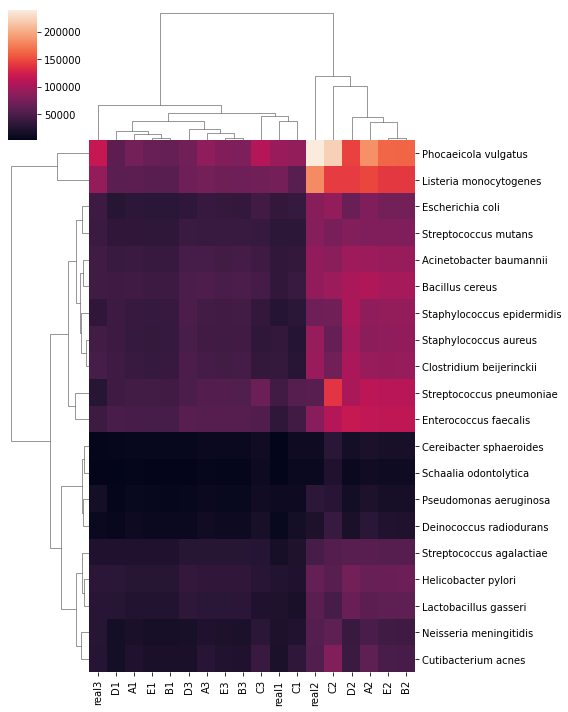

In [15]:
sns.clustermap(nameless_df_reads,figsize=(8, 10))
plt.show()

## read abundances comparison

In [16]:
nameless_df_abund = combined_df_abund.drop(['genus', 'species', 'taxid'], axis=1)
label_names = [i + ' ' + j for i, j in zip(genus, species)]
nameless_df_abund.index = label_names

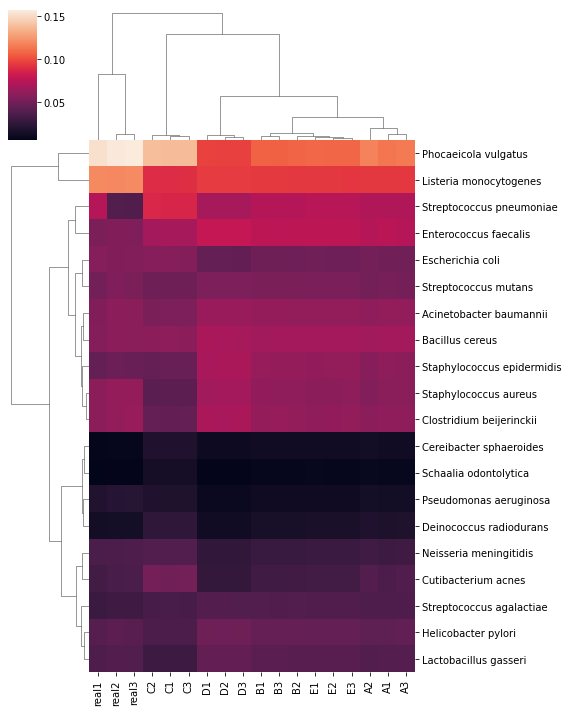

In [24]:
sns.clustermap(nameless_df_abund,figsize=(8, 10))
plt.savefig("kraken2_abundances_clustermap.png", dpi=600) 